In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhisheksjha/time-series-air-quality-data-of-india-2010-2023")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/time-series-air-quality-data-of-india-2010-2023


In [ ]:
import os
import pandas as pd

# Set base directory
data_dir =path

# Load station metadata
stations_df = pd.read_csv(os.path.join(data_dir, 'stations_info.csv'))

# Filter Kolkata stations
kolkata_stations = stations_df[stations_df['city'].str.lower() == 'kolkata']

# Extract corresponding filenames
kolkata_files = kolkata_stations['file_name'].tolist()

# Read and merge all Kolkata datasets
merged_df = pd.DataFrame()
for file_name in kolkata_files:
    file_path = os.path.join(data_dir, f'{file_name}.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['station_file'] = file_name  # To trace back source station
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    else:
        print(f'File not found: {file_path}')

# Optional: Merge station metadata
merged_df = merged_df.merge(kolkata_stations, left_on='station_file', right_on='file_name', how='left')

# Show the result
print(f"Merged {len(kolkata_files)} station files. Final shape: {merged_df.shape}")
merged_df.head()


Merged 7 station files. Final shape: (283132, 36)


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),Xylene (ug/m3),file_name,state,city,agency,station_location,start_month,start_month_num,start_year
0,2016-01-13 11:00:00,2016-01-13 12:00:00,NaN,NaN,7.58,71.88,80.04,NaN,6.08,NaN,...,NaN,NaN,WB002,West Bengal,Kolkata,WBPCB,"Victoria, Kolkata",January,1,2016
1,2016-01-13 12:00:00,2016-01-13 13:00:00,NaN,NaN,6.65,53.87,60.97,NaN,6.72,0.41,...,NaN,NaN,WB002,West Bengal,Kolkata,WBPCB,"Victoria, Kolkata",January,1,2016
2,2016-01-13 13:00:00,2016-01-13 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WB002,West Bengal,Kolkata,WBPCB,"Victoria, Kolkata",January,1,2016
3,2016-01-13 14:00:00,2016-01-13 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WB002,West Bengal,Kolkata,WBPCB,"Victoria, Kolkata",January,1,2016
4,2016-01-13 15:00:00,2016-01-13 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,WB002,West Bengal,Kolkata,WBPCB,"Victoria, Kolkata",January,1,2016


In [ ]:
'''import numpy as np

# Identify numeric columns only (skip strings, dates, etc.)
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Replace NaNs with column mean for each numeric column
for col in numeric_cols:
    if merged_df[col].isnull().any():
        mean_val = merged_df[col].mean()
        merged_df[col].fillna(mean_val, inplace=True)
        print(f'✅ Filled NaNs in "{col}" with mean = {mean_val:.2f}')

# Final check: Any missing values left?
missing_counts = merged_df[numeric_cols].isnull().sum()
if missing_counts.sum() == 0:
    print("\nAll numeric NaNs cleaned. No missing values remain.")
else:
    print("\nWarning: Some NaNs could not be replaced.")
    print(missing_counts[missing_counts > 0])


✅ Filled NaNs in "PM2.5 (ug/m3)" with mean = 55.75
✅ Filled NaNs in "PM10 (ug/m3)" with mean = 108.15
✅ Filled NaNs in "NO (ug/m3)" with mean = 19.32
✅ Filled NaNs in "NO2 (ug/m3)" with mean = 29.72
✅ Filled NaNs in "NOx (ppb)" with mean = 47.08
✅ Filled NaNs in "NH3 (ug/m3)" with mean = 20.86
✅ Filled NaNs in "SO2 (ug/m3)" with mean = 10.20
✅ Filled NaNs in "CO (mg/m3)" with mean = 0.72
✅ Filled NaNs in "Ozone (ug/m3)" with mean = 33.04
✅ Filled NaNs in "Benzene (ug/m3)" with mean = 9.05
✅ Filled NaNs in "Toluene (ug/m3)" with mean = 12.26
✅ Filled NaNs in "Eth-Benzene (ug/m3)" with mean = 2.00
✅ Filled NaNs in "MP-Xylene (ug/m3)" with mean = 2.83
✅ Filled NaNs in "O Xylene (ug/m3)" with mean = 1.34
✅ Filled NaNs in "RH (%)" with mean = 78.54
✅ Filled NaNs in "WS (m/s)" with mean = 0.92
✅ Filled NaNs in "WD (deg)" with mean = 165.60
✅ Filled NaNs in "SR (W/mt2)" with mean = 130.81
✅ Filled NaNs in "BP (mmHg)" with mean = 998.28
✅ Filled NaNs in "VWS (m/s)" with mean = 0.24
✅ Filled Na

<ipython-input-8-367087e48227>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(mean_val, inplace=True)


In [ ]:
import pandas as pd

# --- 1. Define the columns to treat as measurements (pollutants + weather) ---
# Exclude date and metadata columns
exclude = {
    'From Date','To Date','station_file','file_name',
    'state','city','agency','station_location',
    'start_month','start_month_num','start_year'
}
measure_cols = [c for c in merged_df.columns if c not in exclude]

# --- 2. Convert to numeric, coercing errors to NaN ---
merged_df[measure_cols] = merged_df[measure_cols].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

# --- 3. Compute means and fill NaNs in one shot ---
means = merged_df[measure_cols].mean()
merged_df[measure_cols] = merged_df[measure_cols].fillna(means)

# --- 4. Report completion ---
print("✅ Filled missing values for these columns with their means:")
for col, val in means.items():
    print(f"   • {col}: mean = {val:.2f}")

# Final check
remaining_nans = merged_df[measure_cols].isna().sum().sum()
if remaining_nans == 0:
    print("🎯 All missing values cleaned.")
else:
    print(f"⚠️ {remaining_nans} missing values still remain.")


✅ Filled missing values for these columns with their means:
   • PM2.5 (ug/m3): mean = 55.75
   • PM10 (ug/m3): mean = 108.15
   • NO (ug/m3): mean = 19.32
   • NO2 (ug/m3): mean = 29.72
   • NOx (ppb): mean = 47.08
   • NH3 (ug/m3): mean = 20.86
   • SO2 (ug/m3): mean = 10.20
   • CO (mg/m3): mean = 0.72
   • Ozone (ug/m3): mean = 33.04
   • Benzene (ug/m3): mean = 9.05
   • Toluene (ug/m3): mean = 12.26
   • Eth-Benzene (ug/m3): mean = 2.00
   • MP-Xylene (ug/m3): mean = 2.83
   • O Xylene (ug/m3): mean = 1.34
   • RH (%): mean = 78.54
   • WS (m/s): mean = 0.92
   • WD (deg): mean = 165.60
   • SR (W/mt2): mean = 130.81
   • BP (mmHg): mean = 998.28
   • VWS (m/s): mean = 0.24
   • RF (mm): mean = 0.06
   • AT (degree C): mean = 25.99
   • WD (degree): mean = 182.51
   • Temp (degree C): mean = nan
   • Xylene (ug/m3): mean = 1.28
⚠️ 283132 missing values still remain.


In [ ]:
# --- 1. Parse 'From Date' to datetime ---
merged_df['From Date'] = pd.to_datetime(merged_df['From Date'], errors='coerce')

# --- 2. Extract time-based features ---
merged_df['year'] = merged_df['From Date'].dt.year
merged_df['month'] = merged_df['From Date'].dt.month
merged_df['day'] = merged_df['From Date'].dt.day
merged_df['weekday'] = merged_df['From Date'].dt.weekday  # Monday=0
merged_df['is_weekend'] = merged_df['weekday'].isin([5, 6]).astype(int)

# --- 3. Add season mapping (Indian seasons by month) ---
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

merged_df['season'] = merged_df['month'].apply(get_season)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# 1. Define feature lists
# Numeric features: pollutants + weather readings
numeric_features = [
    'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
    'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)',
    'Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (degree)',
    'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)'
]

# Categorical features
categorical_features = ['season', 'station_location', 'agency']

# 2. Build transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 3. Combine into a ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='drop')  # drop all other columns

# 4. Fit-transform your data
X = merged_df.drop(columns=['From Date', 'To Date', 'station_file', 'file_name',
                            'state', 'city', 'start_month', 'start_month_num', 'start_year'])
y = merged_df['PM2.5 (ug/m3)']  # Example target; you can swap in any pollutant

# Add this line to inspect columns in X
print("Columns in X DataFrame:", X.columns.tolist())

X_prepared = preprocessor.fit_transform(X)

print("✅ Preprocessing complete.")
print(f"Transformed feature matrix shape: {X_prepared.shape}")

Columns in X DataFrame: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'RF (mm)', 'AT (degree C)', 'WD (degree)', 'Temp (degree C)', 'Xylene (ug/m3)', 'agency', 'station_location', 'year', 'month', 'day', 'weekday', 'is_weekend', 'season']
✅ Preprocessing complete.
Transformed feature matrix shape: (283132, 28)


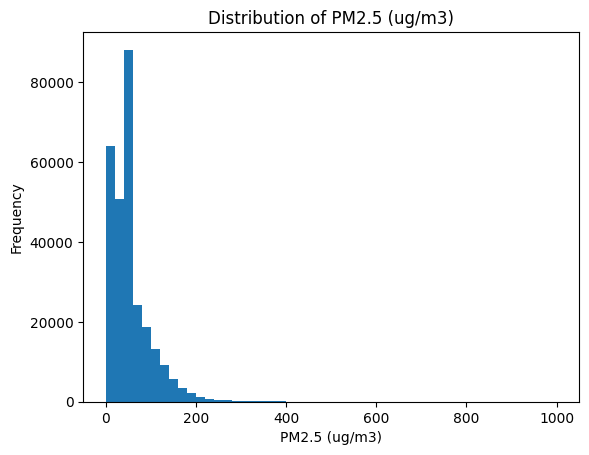

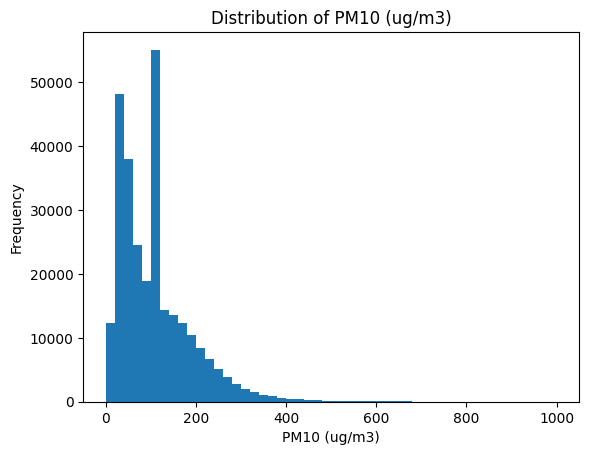

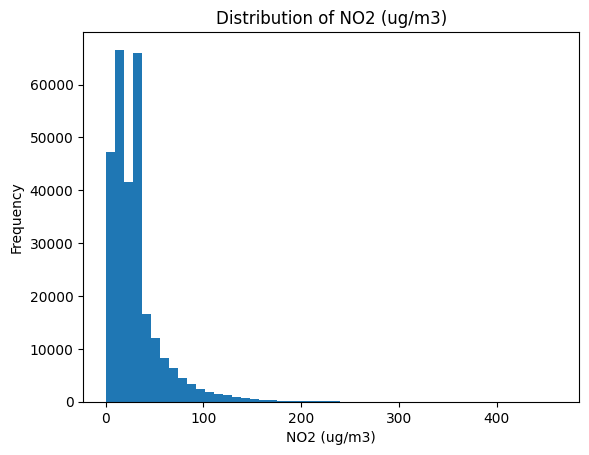

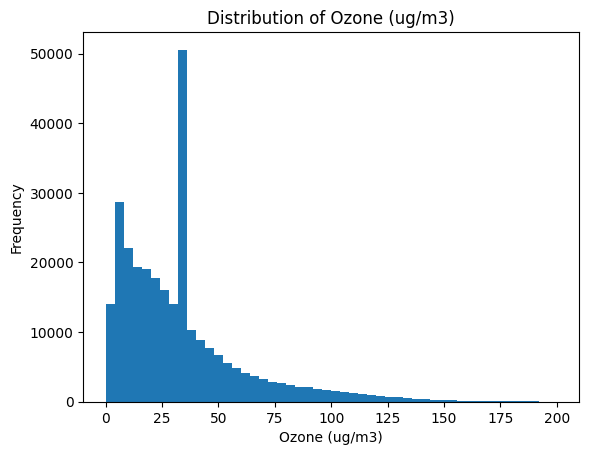

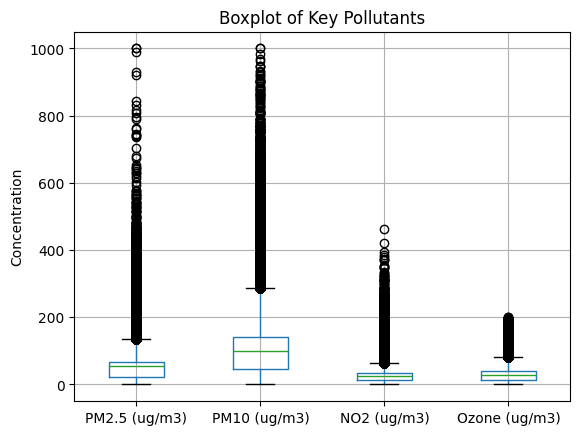

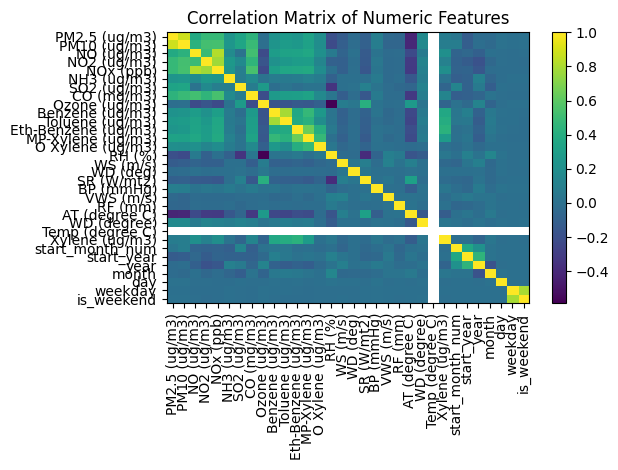

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_df is in the Colab environment
# Select key numeric features for EDA
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)']
numeric_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

# 1. Distribution histograms for key pollutants
for col in pollutants:
    plt.figure()
    plt.hist(merged_df[col].dropna(), bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# 2. Boxplot for key pollutants (outlier detection)
plt.figure()
merged_df[pollutants].boxplot()
plt.title('Boxplot of Key Pollutants')
plt.ylabel('Concentration')
plt.show()

# 3. Correlation matrix heatmap
corr = merged_df[numeric_cols].corr()
plt.figure()
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()


In [ ]:
# Identify potential outliers using Z-score for key numeric columns
from scipy.stats import zscore
import numpy as np

outlier_threshold = 3 # Z-score threshold

# Columns to check for outliers (you can select specific columns)
check_cols = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO2 (ug/m3)', 'Ozone (ug/m3)', 'AT (degree C)', 'RH (%)']

print("\n--- Outlier Identification using Z-score ---")
for col in check_cols:
    if col in merged_df.columns and merged_df[col].dtype in [np.float64, np.int64]:
        print(f"\nChecking column: {col}")
        # Calculate Z-scores, ignoring NaNs if any remain
        merged_df[f'{col}_zscore'] = np.abs(zscore(merged_df[col].dropna()))

        # Identify rows with Z-score > threshold
        outliers = merged_df[merged_df[f'{col}_zscore'] > outlier_threshold]

        if not outliers.empty:
            print(f"Potential outliers found ({len(outliers)} rows):")
            print(outliers[[col, f'{col}_zscore']].head()) # Show first few outliers
            # Optionally, print summary statistics of outliers
            # print(outliers[col].describe())
        else:
            print(f"No outliers found exceeding Z-score threshold of {outlier_threshold} in column {col}.")
        # Drop the temporary zscore column
        merged_df = merged_df.drop(columns=[f'{col}_zscore'])
    elif col not in merged_df.columns:
        print(f"Column '{col}' not found in the DataFrame.")
    else:
         print(f"Column '{col}' is not a numeric type, skipping Z-score check.")


# Identify potential anomalies using IQR method for key numeric columns
print("\n--- Anomaly Identification using IQR ---")
for col in check_cols:
     if col in merged_df.columns and merged_df[col].dtype in [np.float64, np.int64]:
        print(f"\nChecking column: {col}")
        Q1 = merged_df[col].quantile(0.25)
        Q3 = merged_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify anomalies outside IQR range
        anomalies = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]

        if not anomalies.empty:
            print(f"Potential anomalies found ({len(anomalies)} rows):")
            print(anomalies[[col]].head()) # Show first few anomalies
             # Optionally, print summary statistics of anomalies
            # print(anomalies[col].describe())
        else:
            print(f"No anomalies found outside the IQR range in column {col}.")
     elif col not in merged_df.columns:
        print(f"Column '{col}' not found in the DataFrame.")
     else:
         print(f"Column '{col}' is not a numeric type, skipping IQR check.")




--- Outlier Identification using Z-score ---

Checking column: PM2.5 (ug/m3)
Potential outliers found (4443 rows):
       PM2.5 (ug/m3)  PM2.5 (ug/m3)_zscore
21698         297.25              5.253643
24682         342.52              6.238456
24683         537.36             10.477048
24684         530.03             10.317590
24685         361.80              6.657878

Checking column: PM10 (ug/m3)
Potential outliers found (4066 rows):
      PM10 (ug/m3)  PM10 (ug/m3)_zscore
5949        725.30             7.437766
5950        362.64             3.067088
5997        413.75             3.683051
6783        366.58             3.114571
6805        436.71             3.959759

Checking column: NO2 (ug/m3)
Potential outliers found (6451 rows):
    NO2 (ug/m3)  NO2 (ug/m3)_zscore
30       128.95            3.608744
31       166.59            4.977610
32       154.98            4.555385
33       146.15            4.234262
34       141.67            4.071336

Checking column: Ozone (ug/m3)
P

In [ ]:
# --- 1. Parse 'From Date' to datetime ---
merged_df['From Date'] = pd.to_datetime(merged_df['From Date'], errors='coerce')

# --- 2. Extract time-based features ---
merged_df['year'] = merged_df['From Date'].dt.year
merged_df['month'] = merged_df['From Date'].dt.month
merged_df['day'] = merged_df['From Date'].dt.day
merged_df['weekday'] = merged_df['From Date'].dt.weekday  # Monday=0
merged_df['is_weekend'] = merged_df['weekday'].isin([5, 6]).astype(int)

# --- 3. Add season mapping (Indian seasons by month) ---
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

merged_df['season'] = merged_df['month'].apply(get_season)

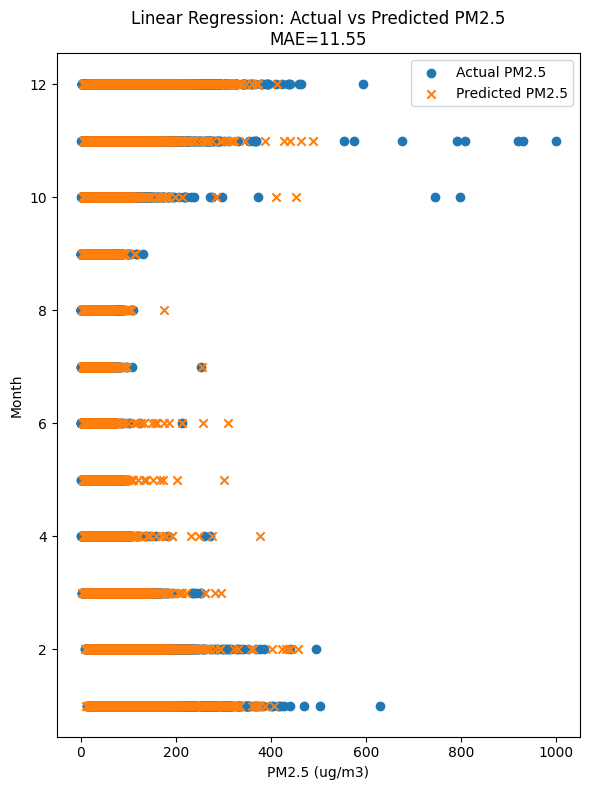

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 3. Select features for Linear Regression
features = ['month', 'PM10 (ug/m3)', 'NO2 (ug/m3)']
X = merged_df[features]
y = merged_df['PM2.5 (ug/m3)']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

# 6. Evaluate
mae = mean_absolute_error(y_test, preds)

# 7. Plot actual vs predicted with month on y-axis
plt.figure(figsize=(6, 8))
plt.scatter(y_test, X_test['month'], label='Actual PM2.5')
plt.scatter(preds, X_test['month'], label='Predicted PM2.5', marker='x')
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Month')
plt.title(f'Linear Regression: Actual vs Predicted PM2.5\nMAE={mae:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


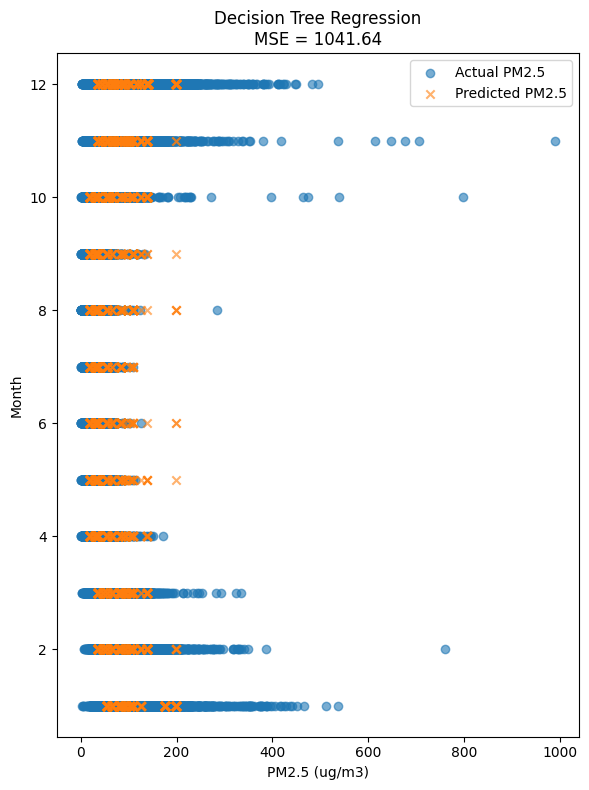

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 3. Prepare features: month, relative humidity, wind speed
cols = ['month', 'RH (%)', 'WS (m/s)', 'PM2.5 (ug/m3)']
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df[cols] = merged_df[cols].fillna(merged_df[cols].mean())

X = merged_df[['month', 'RH (%)', 'WS (m/s)', 'NO2 (ug/m3)', 'CO (mg/m3)']]
y = merged_df['PM2.5 (ug/m3)']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# 5. Train Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=32)
dt.fit(X_train, y_train)
preds = dt.predict(X_test)

# 6. Evaluate
mse = mean_squared_error(y_test, preds)

# 7. Plot actual vs predicted vs month
plt.figure(figsize=(6,8))
plt.scatter(y_test, X_test['month'], label='Actual PM2.5', alpha=0.6)
plt.scatter(preds, X_test['month'], label='Predicted PM2.5', marker='x', alpha=0.6)
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Month')
plt.title(f'Decision Tree Regression\nMSE = {mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest MAE: 23.53, MSE: 1373.96


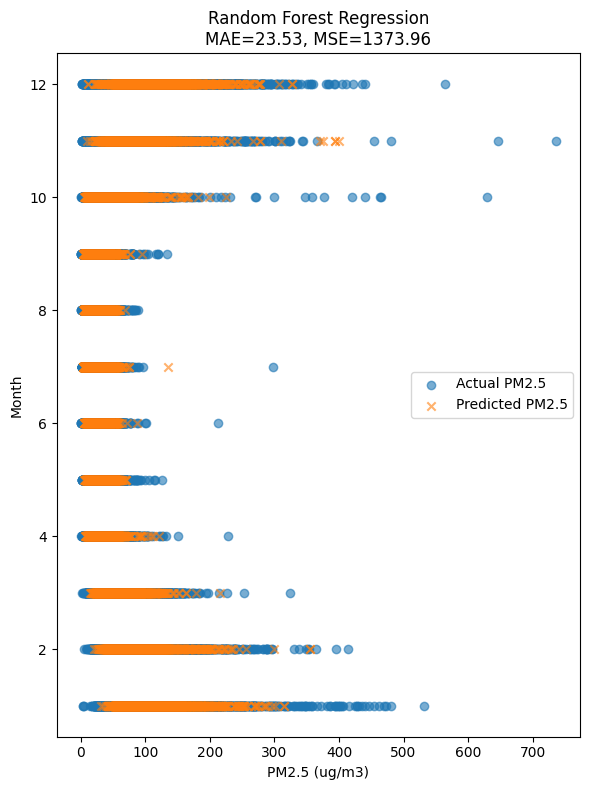

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Prepare features for Random Forest
# Choose month, temperature, and rainfall as predictors
features = ['month', 'Ozone (ug/m3)', 'RF (mm)']
target = 'PM2.5 (ug/m3)'

# Convert to numeric and impute
cols = features + [target]
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df[cols] = merged_df[cols].fillna(merged_df[cols].mean())

X = merged_df[features]
y = merged_df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# 5. Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

# 6. Evaluate performance
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"Random Forest MAE: {mae:.2f}, MSE: {mse:.2f}")

# 7. Plot actual vs predicted PM2.5 with month on y-axis
plt.figure(figsize=(6, 8))
plt.scatter(y_test, X_test['month'], label='Actual PM2.5', alpha=0.6)
plt.scatter(preds, X_test['month'], label='Predicted PM2.5', marker='x', alpha=0.6)
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Month')
plt.title(f'Random Forest Regression\nMAE={mae:.2f}, MSE={mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


Gradient Boosting MAE: 20.57, MSE: 1035.77


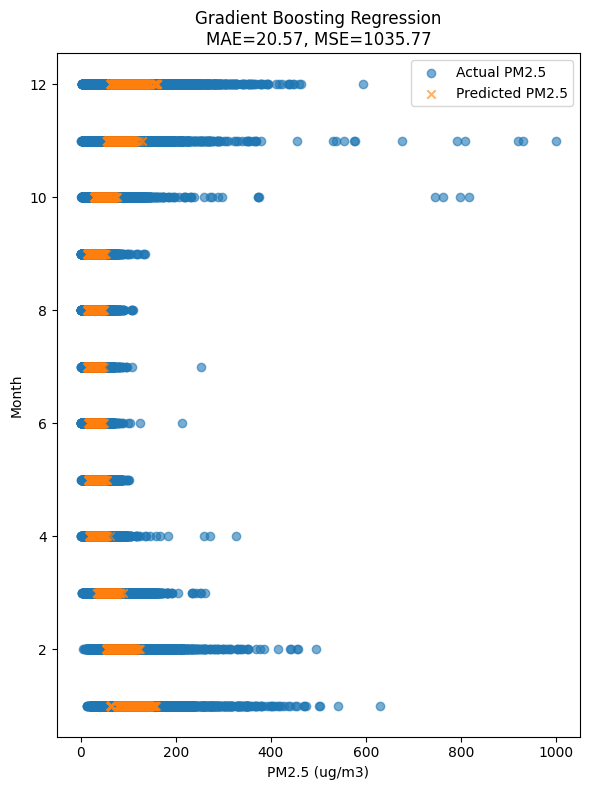

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# 3. Prepare features for Gradient Boosting
# Choose month, wind speed, and wind direction as predictors
features = ['month', 'WS (m/s)', 'WD (degree)','RH (%)']
target = 'PM2.5 (ug/m3)'

# Convert to numeric and impute
cols = features + [target]
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df[cols] = merged_df[cols].fillna(merged_df[cols].mean())

X = merged_df[features]
y = merged_df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Train Gradient Boosting model
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,
                               max_depth=3, random_state=42)
gb.fit(X_train, y_train)
preds = gb.predict(X_test)

# 6. Evaluate performance
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print(f"Gradient Boosting MAE: {mae:.2f}, MSE: {mse:.2f}")

# 7. Plot actual vs predicted PM2.5 with month on y-axis
plt.figure(figsize=(6, 8))
plt.scatter(y_test, X_test['month'], label='Actual PM2.5', alpha=0.6)
plt.scatter(preds, X_test['month'], label='Predicted PM2.5', marker='x', alpha=0.6)
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Month')
plt.title(f'Gradient Boosting Regression\nMAE={mae:.2f}, MSE={mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


MLP Regressor MAE: 19.62, MSE: 1031.89


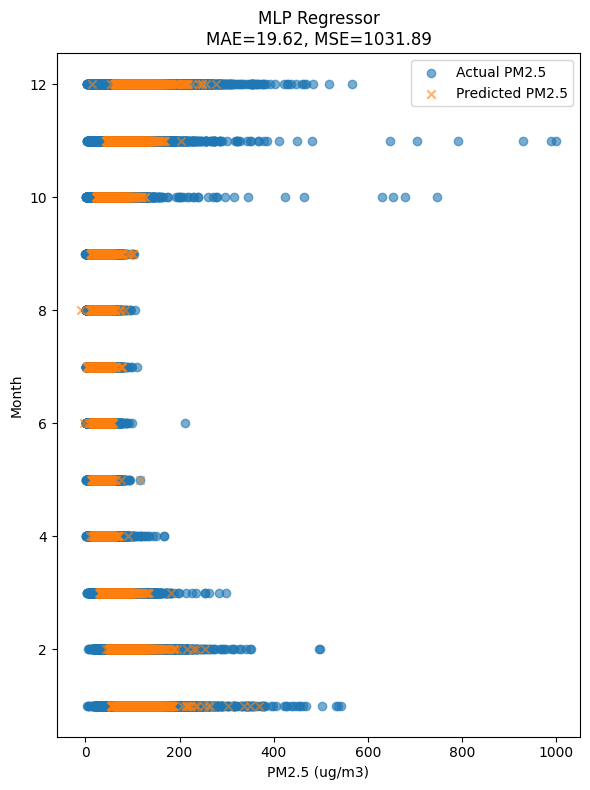

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


# 3. Prepare features for MLP Regressor
# Choose month, temperature, and humidity as predictors
features = ['month', 'NO (ug/m3)', 'RH (%)','SO2 (ug/m3)']
target = 'PM2.5 (ug/m3)'

# Convert to numeric and impute
cols = features + [target]
merged_df[cols] = merged_df[cols].apply(pd.to_numeric, errors='coerce')
merged_df[cols] = merged_df[cols].fillna(merged_df[cols].mean())

X = merged_df[features]
y = merged_df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30
)

# 5. Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=300, random_state=36)
mlp.fit(X_train, y_train)
preds = mlp.predict(X_test)

# 6. Evaluate performance
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print(f"MLP Regressor MAE: {mae:.2f}, MSE: {mse:.2f}")

# 7. Plot actual vs predicted PM2.5 with month on y-axis
plt.figure(figsize=(6, 8))
plt.scatter(y_test, X_test['month'], label='Actual PM2.5', alpha=0.6)
plt.scatter(preds, X_test['month'], label='Predicted PM2.5', marker='x', alpha=0.6)
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Month')
plt.title(f'MLP Regressor\nMAE={mae:.2f}, MSE={mse:.2f}')
plt.legend()
plt.tight_layout()
plt.show()
